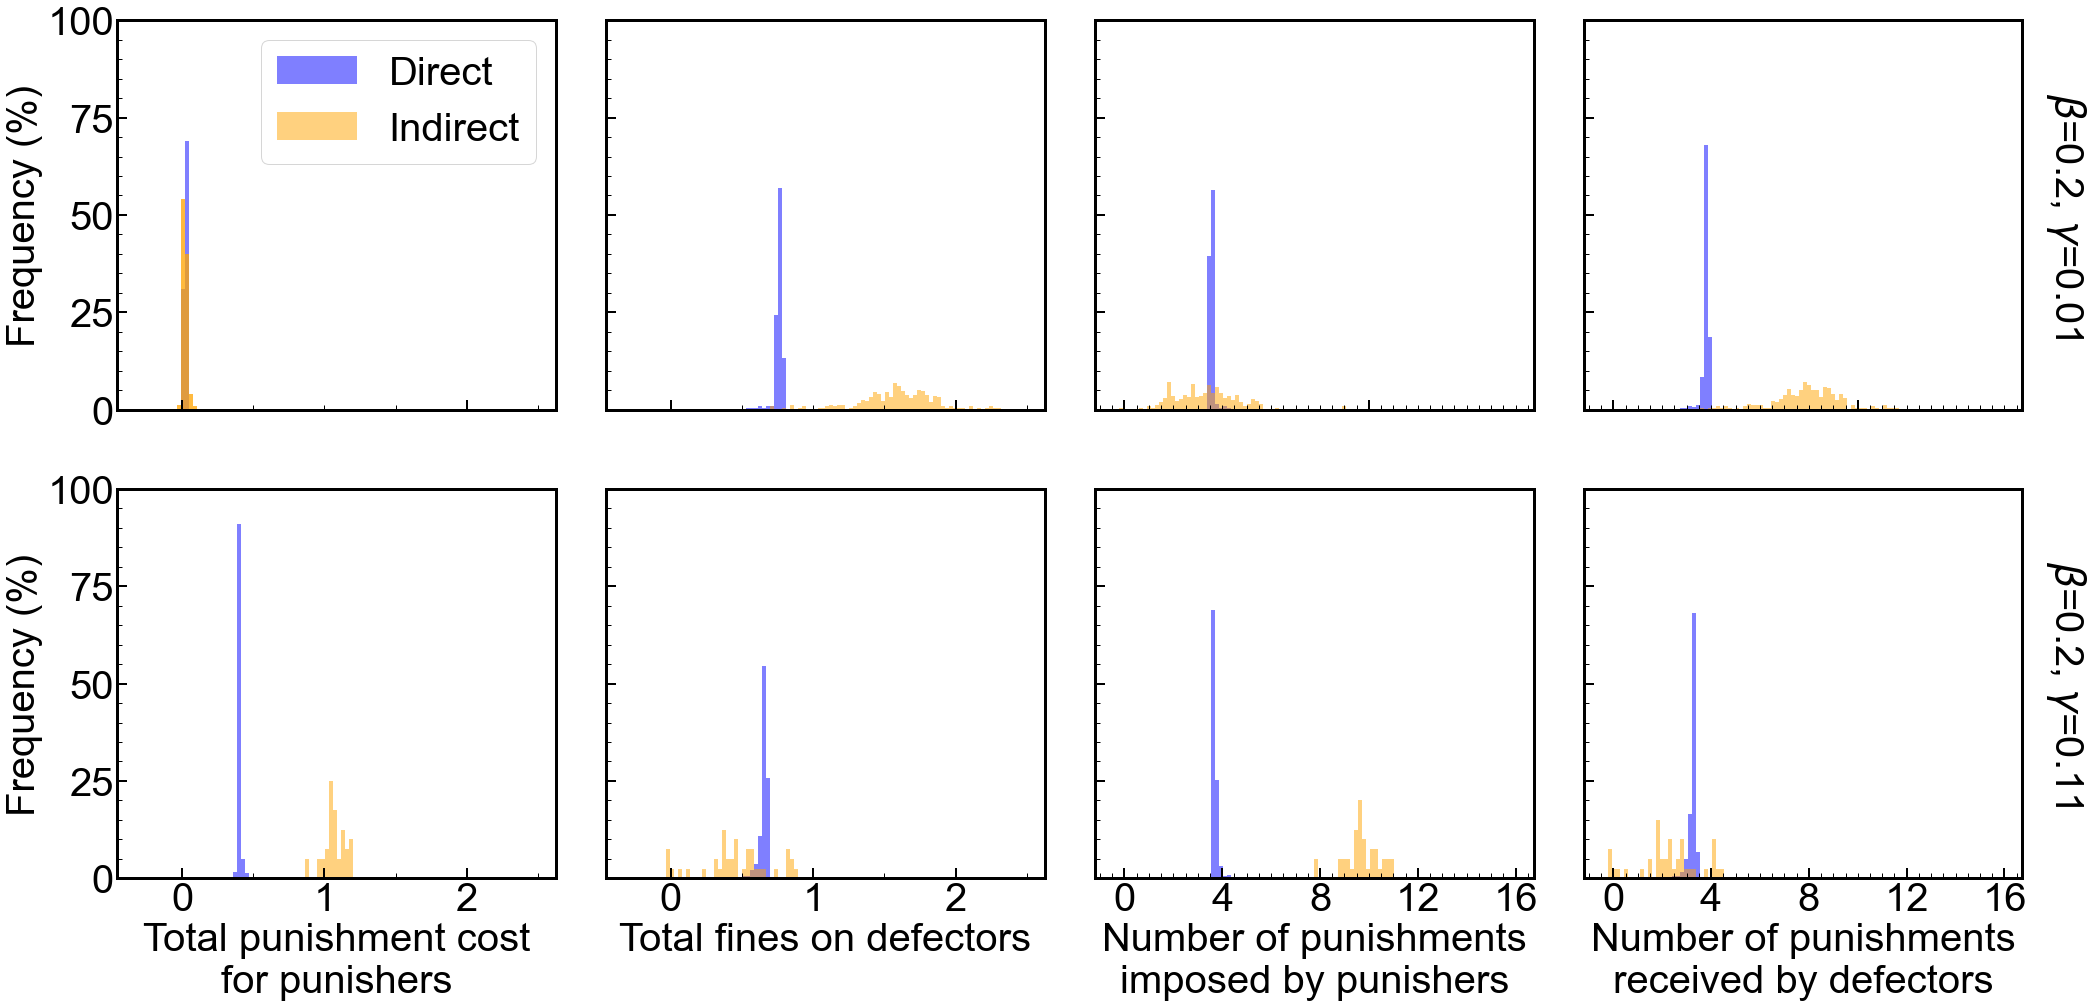

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# 从Excel文件中读取数据
data_excel = pd.read_excel('F:/大学院/研究/新しいデータ/time steps/fine/cost and fine 3.xlsx')

# 读取数据列
data1 = data_excel.iloc[:, 1]
data2 = data_excel.iloc[:, 2]
data3 = data_excel.iloc[:, 3]
data4 = data_excel.iloc[:, 4]
data5 = data_excel.iloc[:, 5]
data6 = data_excel.iloc[:, 6]
data7 = data_excel.iloc[:, 7]
data8 = data_excel.iloc[:, 8]
data9 = data_excel.iloc[:, 9]
data10 = data_excel.iloc[:, 10]
data11 = data_excel.iloc[:, 11]
data12 = data_excel.iloc[:, 12]
data13 = data_excel.iloc[:, 13]
data14 = data_excel.iloc[:, 14]
data15 = data_excel.iloc[:, 15]
data16 = data_excel.iloc[:, 16]

# 设置区间数
num_bins = 100

# 函数：绘制单个子图
def plot_histogram(ax, data_a, data_b, title, xlabel, ylabel, range_limits, is_first_plot, gamma):
    counts_a, bins_a = np.histogram(data_a, bins=num_bins, range=range_limits)
    counts_b, bins_b = np.histogram(data_b, bins=num_bins, range=range_limits)
    bin_width_a = np.diff(bins_a)
    bin_width_b = np.diff(bins_b)
    total_a = np.sum(counts_a)
    percentage_a = counts_a / total_a * 100
    total_b = np.sum(counts_b)
    percentage_b = counts_b / total_b * 100

    if is_first_plot:  # 如果是第一个图，画出Direct，并设置为蓝色
        ax.bar(bins_a[:-1], percentage_a, width=bin_width_a, alpha=0.5, label='Direct', color='blue')
        ax.bar(bins_b[:-1], percentage_b, width=bin_width_b, alpha=0.5, label='Indirect', color='orange') 
        ax.legend()  # 添加图例
    else:
        ax.bar(bins_a[:-1], percentage_a, width=bin_width_a, alpha=0.5, color='blue')  # 不画标签，颜色为蓝色
    ax.bar(bins_b[:-1], percentage_b, width=bin_width_b, alpha=0.5, color='orange')  # 画出Indirect，颜色为橙色
    ax.set_xlabel(xlabel)
    if ylabel:  # 如果提供了 ylabel 则设置 y 轴标签
        ax.set_ylabel(ylabel)  # 不设置字体粗细
    ax.set_ylim(0, 100)  # 设置 y 轴范围

    # 设置边框加粗
    for spine in ax.spines.values():
        spine.set_linewidth(3)

    # 设置刻度线向内，并增加长度
    ax.tick_params(axis='both', direction='in', width=2, length=10)

    # 设置次刻度线
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.tick_params(axis='both', which='minor', direction='in', width=1, length=5)

# 设置全局字体属性，包括字体大小和字体族，将字体权重设置为粗体
plt.rcParams.update({'font.size': 40, 'font.family': 'Arial', 'font.weight': 'normal'})

# 创建图形和子图
fig, axs = plt.subplots(2, 4, figsize=(30, 15))

# 绘制八个子图
plot_histogram(axs[0, 0], data1, data5, '',
               '', 'Frequency (%)', range_limits=(-0.3, 2.5), is_first_plot=True, gamma=None)
plot_histogram(axs[0, 1], data2, data6, '',
               '', '', range_limits=(-0.3, 2.5), is_first_plot=False, gamma=None)
plot_histogram(axs[0, 2], data3, data7, '',
               '', '', range_limits=(-0.3, 16), is_first_plot=False, gamma=None)
plot_histogram(axs[0, 3], data4, data8, '',
               '', '', range_limits=(-0.3, 16), is_first_plot=False, gamma=0.01)

plot_histogram(axs[1, 0], data9, data13, '',
               'Total punishment cost\nfor punishers', 'Frequency (%)', range_limits=(-0.3, 2.5), is_first_plot=False, gamma=None)
axs[1, 0].xaxis.set_major_locator(MultipleLocator(1))  # 横坐标刻度间隔为1

plot_histogram(axs[1, 1], data10, data14, '',
               'Total fines on defectors', '', range_limits=(-0.3, 2.5), is_first_plot=False, gamma=None)
axs[1, 1].xaxis.set_major_locator(MultipleLocator(1))  # 横坐标刻度间隔为1

plot_histogram(axs[1, 2], data11, data15, '',
               'Number of punishments\nimposed by punishers', '', range_limits=(-0.3, 16), is_first_plot=False, gamma=None)
axs[1, 2].xaxis.set_major_locator(MultipleLocator(4))  # 横坐标刻度间隔为1

plot_histogram(axs[1, 3], data12, data16, '',
               'Number of punishments\nreceived by defectors', '', range_limits=(-0.3, 16), is_first_plot=False, gamma=0.11)
axs[1, 3].xaxis.set_major_locator(MultipleLocator(4))  # 横坐标刻度间隔为1


# 隐藏 axs[0, 1], axs[0, 2], axs[0, 3], axs[1, 1], axs[1, 2], axs[1, 3] 的 y 轴标签
for ax in [axs[0, 1], axs[0, 2], axs[0, 3], axs[1, 1], axs[1, 2], axs[1, 3]]:
    ax.set_yticklabels([])

# 隐藏第一行的 x 轴标签
for ax in [axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3]]:
    ax.set_xticklabels([])

# 在第一行的最后一个图的右边添加 β=0.2 和 γ=0.01 文本，旋转90度
axs[0, 3].text(1.1, 0.5, r'$\beta$=0.2, $\gamma$=0.01', horizontalalignment='center', verticalalignment='center', transform=axs[0, 3].transAxes, fontsize=40, rotation=270)
axs[1, 3].text(1.1, 0.5, r'$\beta$=0.2, $\gamma$=0.11', horizontalalignment='center', verticalalignment='center', transform=axs[1, 3].transAxes, fontsize=40, rotation=270)
# 在整个八张图的最上边中间添加 β=0.2 文本
#fig.text(0.51, 0.99,  r'$\beta$=0.2', horizontalalignment='center', verticalalignment='bottom', fontsize=35, fontweight='bold')

# 在整个八张图的最下边中间添加 Value 文本
#fig.text(0.5, -0.02, 'Value', horizontalalignment='center', verticalalignment='bottom', fontsize=35, fontweight='bold')

# 调整布局
plt.tight_layout()

# 导出为PDF文件
plt.savefig('929histogram_plots.pdf', format='pdf', bbox_inches='tight')

# 显示图形
plt.show()
